---
## Mount the google Drive. 
---
1. Run the codes below
2. Click on the link provided
3. login with you google account
4. Copy and paste the given authorization codes to the textbox provided

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Click on the folder icon on the left.<br>
2. Navigate to the course folder<br>
3. Click on the menu button (three dots)
4. Click on "copy path".<br>
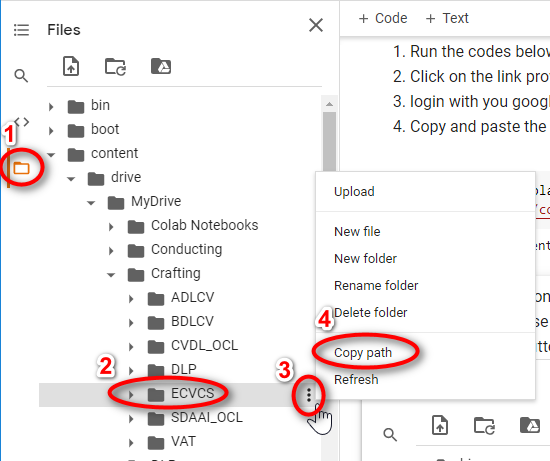
<br>
5. Paste the copied path into the code below.

In [2]:
course_path = "/content/drive/MyDrive/Crafting/ECVCS"

In [3]:
!pip install google-cloud-automl

In [4]:
from google.cloud import automl

# TODO(developer): Uncomment and set the following variables
project_id = "cvdl-demo-12345"
model_id = "ICN8422406403322281984"
file_path = course_path + "/CatsNDogs/test/1.jpg"

import io
import os

# Set up the credential (Set this credentail as project owner role)
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/My Drive/cloud_vision.json"

prediction_client = automl.PredictionServiceClient()

# Get the full path of the model.
model_full_id = automl.AutoMlClient.model_path(
    project_id, "us-central1", model_id)


# Read the file.
with open(file_path, "rb") as content_file:
    content = content_file.read()

image = automl.Image(image_bytes=content)
payload = automl.ExamplePayload(image=image)

# params is additional domain-specific parameters.
# score_threshold is used to filter the result
# https://cloud.google.com/automl/docs/reference/rpc/google.cloud.automl.v1#predictrequest
params = {"score_threshold": "0.8"}

request = automl.PredictRequest(
    name=model_full_id, payload=payload, params=params)
response = prediction_client.predict(request=request)

print("Prediction results:")
for result in response.payload:
    print("Predicted class name: {}".format(result.display_name))
    print("Predicted class score: {}".format(result.classification.score))

Prediction results:
Predicted class name: Dog
Predicted class score: 0.9997015595436096
